In [22]:
import torch
import json
from torchvision.io import read_image
from matplotlib import pyplot as plt
from unet import UNet
from dotmap import DotMap

In [23]:
config = json.load(open("configurations/default.json"))
config = DotMap(config, _dynamic=False)

In [24]:
# IMG = "f91b26bb30af4773a843d28a213e6726.png"
IMG = "4274475b3ae5439d86365be6565be94e.png"
# IMG = "1f465c895de148de9bfb9cbad339e4ed.png"

In [25]:
model = UNet(config) 
model.load_state_dict(torch.load("checkpoints/breast_cancer/default/checkpoint_6_0.70.pt")["model_state_dict"])

<All keys matched successfully>

In [26]:
img = read_image(f"data/preprocessed/breast_cancer/test/{IMG}").type(torch.float32)
out = model.forward(img.unsqueeze(0))

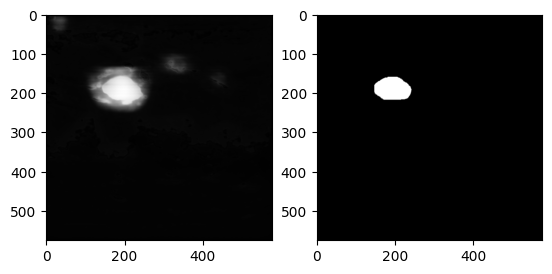

In [27]:
axes = plt.subplots(1, 2)[1]

out_img = torch.sigmoid(out).detach().numpy()
true = read_image(f"data/preprocessed/breast_cancer/test/masks/{IMG}")

axes[0].imshow(out_img[0, 0], cmap='gray')
axes[1].imshow(true[0], cmap='gray')

In [28]:
out_img.max(), out_img.min()

(0.91214794, 0.006962974)